# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
mnist = fetch_openml('mnist_784')

X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000], y[36000]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

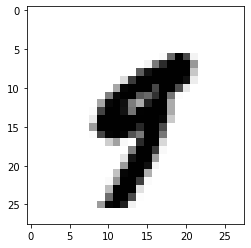

In [5]:
plt.imshow(X[36000].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = 'nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_train5 = (y_train == '5')
y_test5 = (y_test == '5')

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time

model = LogisticRegression(max_iter = 2000)
model.fit(X_train, y_train5)

### Does the classifier predict correctly the 36000th digit we picked before?

In [11]:
model.predict(X[[36000]])

array([False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [13]:
never_5_clf.fit(X_train, y_train5)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
y_pred_never5 = never_5_clf.predict(X_test)

In [16]:
pd.DataFrame(confusion_matrix(y_test5, y_pred_never5))

,0,1
0,9108,0
1,892,0


In [17]:
y_pred_5 = model.predict(X_test)

In [18]:
pd.DataFrame(confusion_matrix(y_test5, y_pred_5))

,0,1
0,9029,79
1,145,747


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [19]:
# comment

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [20]:
from sklearn.metrics import roc_curve

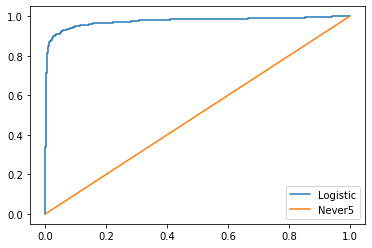

In [21]:
fpr, tpr, thresholds = roc_curve(y_test5, model.predict_proba(X_test)[:, 1], )
fpr_never5, tpr_never5, thresholds_never5 = roc_curve(y_test5, never_5_clf.predict(X_test))

plt.plot(fpr, tpr, label='Logistic')
plt.plot(fpr_never5, tpr_never5, label='Never5')
plt.legend()

### Now find the roc_auc_score for each. 

In [22]:
from sklearn.metrics import roc_auc_score

# logistic
roc_auc_score(y_test5, model.predict_proba(X_test)[:,1])

0.9747624913592938

In [23]:
# never5
roc_auc_score(y_test5, never_5_clf.predict(X_test))

0.5

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

In [31]:
from yellowbrick.classifier import ROCAUC

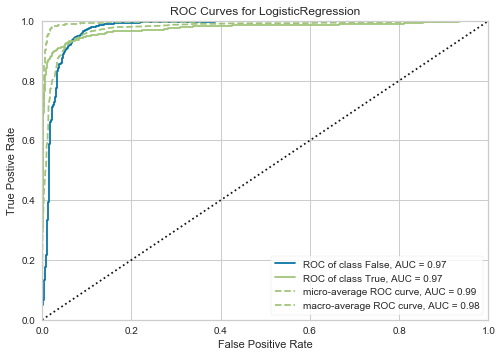

In [32]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train5)
visualizer.score(X_test, y_test5)
visualizer.show()

### What does this metric tell you? Which classifier works better with this metric in mind?